In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
x = np.linspace(0, 10, num=11)
y = np.cos(-x**2/9.0)

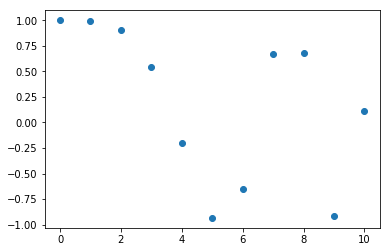

In [13]:
plt.plot(x,y,'o')

# Splines Interpolation

I know the real function $f(x) = \cos(\frac{-x^2}{9})$ sampled in the sample points $\bar{x} = 1, 2, \dots, n$

In [45]:
sx = np.linspace(0, 10, num=11)
sy = np.cos(-x**2/9.0)

I want to evaluate my splined-function in a certain set of point that I call $x$

In [122]:
x = np.linspace(0, 10, num=100)

I need to identify the _n_ intervals into I want to define my piecewise function.

In [123]:
bool_intervals = [(sx[i] <= x)& (x < sx[i+1]) for i in range(len(sx)-1)]
#This list should be done in a more intelligent way!

I define every piece of my function in a list of functions

In [124]:
from functools import partial
def func_piece(n,x):
    return y[n] + (y[n+1] - y[n])/(sx[n+1]-sx[n])*(x-sx[n])
func_pieces = [partial(func_piece, i) for i in range(len(sx)-1)]   

I define my vector of values avaluated on the splined function

In [125]:
spline_y=np.piecewise(x, bool_intervals, func_pieces)

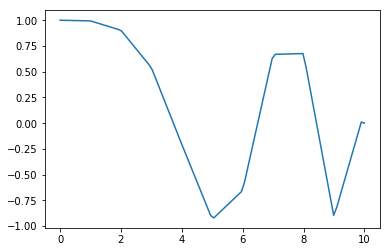

In [128]:
plt.plot(x, spline_y,'-')

Now I try a more clear implementation

In [153]:
def triangolar_function(x, h):
    abs_x = np.abs(x)
    return np.piecewise(x,[abs_x < h, abs_x >= h],[lambda x : 1 - np.abs(x)/h , lambda x: 0])    

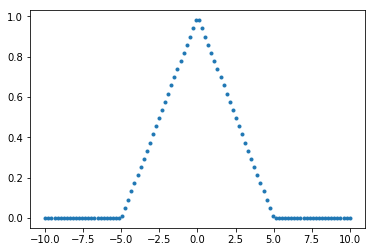

In [162]:
x = np.linspace(-10, 10, 100)
y = triangolar_function(x,5)
plt.plot(x,y,'.')